## Assignment2 Car Price Prediction (Cont.)


Chaky's Company would like to predict the car price for cars that will be made in the future. As an data scientist, I was assigned to implemented web-based car price prediction system. According to the information, this problem is cinsidered as a regression problem since I would like to predict selling price which is continuouse values.
<br></br>
The followings describe the features.
- name: brand of cars
- year
- selling price: in Baht
- km driven: kilometers of a car that have driven
- fuel: Diesel and Petrol
- transmission
- owner
- mileage
-engine
- max power
- torque
- seats

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

## load data

In [2]:
df = pd.read_csv("Cars.csv")

In [3]:
#show the table
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data
df.shape

(8128, 13)

It means this table consist of 8128 samples, and 12 features

In [5]:
# Statistical info Hint: look up .describe()
df.describe()


,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check Dtypes of your input data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


Many features are needed to change data type from object to numerical types so that I will be able to use features to predict selling price. 

In [7]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Exploratory Data Analysis

I rearranged data according to requiements of Chaky's Company

-univariate analysis
-multivariate analysis
(later)

In [8]:
#check data in the feature owner
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [9]:
#For the feature owner, map First Owner to 1, ..., Test Drive Car to 5

# Using Dictionary for mapping
dict_map = {'First Owner': 1,
    'Second Owner': 2, 'Third Owner' :3, 'Fourth & Above Owner' :4, 'Test Drive Car':5}
updateOwner = df['owner'].map(dict_map)
df['owner'] = updateOwner

In [10]:
#For the feature fuel, remove all rows with CNG and LPG
df = df[df["fuel"].str.contains("CNG|LPG") == False]

In [11]:
#For the featurre mileage, remove "kmpl" and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype(float)

In [12]:
#For the feature engine, remove "CC" and convert the column to float
df['engine'] = df['engine'].str.replace('CC', '').astype(float)

In [13]:
#For the feature max power, remove "bhp" and convert the column to float
df['max_power'] = df['max_power'].str.replace('bhp', '').astype(float)

In [14]:
#For the feature brand, take only the first word and remove the rest

updateBrand = df['name'].str.split().str.get(0)
df['name'] = updateBrand

In [15]:
#Drop the feature torque since Chaky's company does not understand the kind of information
df =df.drop(columns=["torque"])

In [16]:
#Delete all sample related to Test Drive Cars because they are too expensive so that Chaky's company doesn't interested
df = df.loc[df["owner"] != 5 ]

In [17]:
#list unique values in the column fuel, and the data contains of 2 types of fuel which are Dissel and Petrol
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

Next, I will convert categorical type of features in to numerical so that I can develop prdict system using these features.

In [18]:
#use label encoding to covert fuel types to numbers
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])
df['fuel'] = le.fit_transform(df['fuel'])


In [19]:
#list unique values in the column seller_type, and the data contains of 3 types of sellers which are Individual, Dealer, and Trutmark Dealer
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [20]:
#use label encoding to covert seller types to numbers
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'] = le.fit_transform(df['seller_type'])


In [21]:
#list unique values in the column transmission, and the data contains of 2 types of transmission which are Munual, and Automatic
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [22]:
#use label encoding to covert transmission categories to numbers
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'] = le.fit_transform(df['transmission'])

In [23]:
#use label encoding to covert brands to numbers
df['name'] = le.fit_transform(df['name'])
df['name'] = le.fit_transform(df['name'])

In [24]:
#transform selling price using log transform because big number can cause prediction to be unstable
df['selling_price'] = np.log(df["selling_price"])

In [25]:
#After adjust the data follow the requirements, show the adjusted data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,1,16.10,1298.0,88.20,5.0


##  Feature selection

For feature selection, I used the same features as A1 which are max_power, mileage, year 

### Train test split

In [28]:
#x is our strong features
X = df[['max_power', 'mileage',  'year']]

#y is selling price column which I would like to predict
y = df["selling_price"]

m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

In [29]:
#split data into train and test set with ratio 70:30, and choose random state = 42
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#convert into array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## Preprocessing

### Null values

In [30]:
#check for null values for X_trrain
X_train[['max_power', 'mileage',  'year']].isna().sum()

max_power    149
mileage      154
year           0
dtype: int64

In [31]:
#check for null values for X_test
X_test[['max_power', 'mileage',  'year']].isna().sum()

max_power    59
mileage      60
year          0
dtype: int64

To conclude, this data has missing information on amx_power and mileage so I have to find which imputation method I should replace null values.

<Axes: xlabel='max_power'>

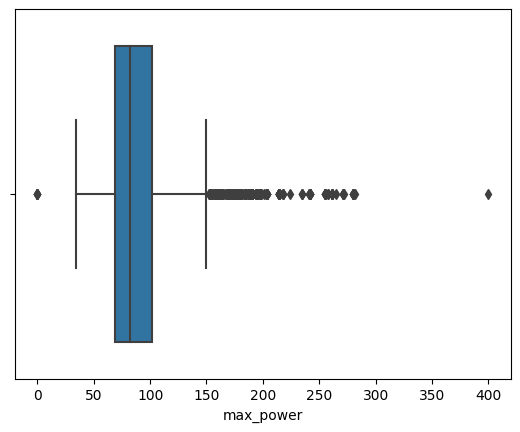

In [32]:
#use boxplot to see distribution of max power values
sns.boxplot(data=df, x='max_power')

It seems like there are many outliers. Therefore, mean is not a good way to replace null values so that I replace them with median instead

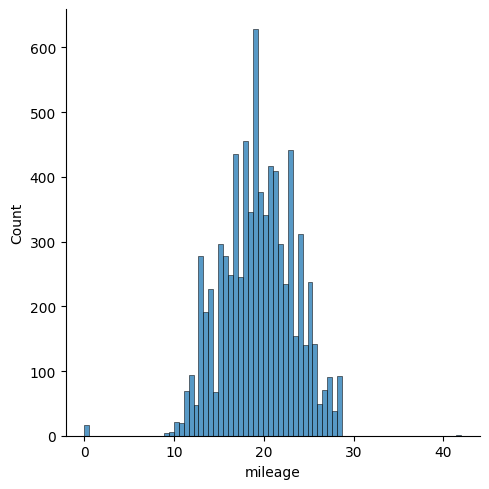

In [33]:
#use distribution plot to see data distribution of mileage
sns.displot(data=df, x= 'mileage')

The data look like a normal distribution. Therefore, mean is a good way to replace null values.

In [34]:
#fill the training set 

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)


In [35]:
#fill the testing set with the training distribution 

X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [36]:
#check null values to make sure that there is no null values left
X_train[['max_power', 'mileage', 'year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [37]:
X_test[['max_power', 'mileage',  'year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['year','mileage','max_power']] = scaler.fit_transform(X_train[['year','mileage','max_power']])
X_test[['year','mileage','max_power']]  = scaler.transform(X_test[['year','mileage','max_power']])

## Modeling



In the experiment, I will perform using MLflow

In [1]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "thamakorn"
#mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="a2_experiment_v2")

<Experiment: artifact_location='mlflow-artifacts:/618279163567556626', creation_time=1694507618131, experiment_id='618279163567556626', last_update_time=1694507618131, lifecycle_stage='active', name='a2_experiment_v2', tags={}>

In [42]:

intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [43]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #cross validation
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch',initweight ='zero', momentum = 0, num_epochs=50, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.initweight     = initweight
        self.momentum = momentum

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]

    def mse_sto(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum()
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()

        #create a list of kfold r2
        self.r2_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            

            if self.initweight == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            elif self.initweight == 'xavier':
                #m is number of samples
                m = X_cross_train.shape[0]
                #range
                lower, upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m))
                #generate random numbers
                num = np.random.rand(X_cross_train.shape[1])

                self.theta = lower + num *(upper - lower)
            #print(self.theta)
            #reset previous gradient
            self.prev_grad = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__ , "initweight": self.initweight, "momentum": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train_sto(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="r2", value=r2, step=epoch)
                    
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                self.r2_scores.append(r2)
                print(f"Fold {fold}: mse: {val_loss_new} r2: {r2}")
        print(f"mean of mse: {sum(self.kfold_scores) / len(self.kfold_scores)}")    
        print(f"mean of r2: {sum(self.r2_scores) / len(self.r2_scores)}")
        for i, theta in enumerate(self.theta[1:]):
            mlflow.log_metric(key=f"weight-{i}", value=theta)
        
        mlflow.log_metric(key="Mean mse", value=sum(self.kfold_scores) / len(self.kfold_scores))
        mlflow.log_metric(key="Mean rsquare", value=sum(self.r2_scores) / len(self.r2_scores))
        params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__, "weight": self.initweight, "momentum": self.momentum}
        mlflow.log_params(params=params)
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad) + self.momentum*self.prev_grad       # with momentum when momentum not equal 0
        self.prev_grad = grad
        return self.mse(y, yhat)

    # train function for sto 

    def _train_sto(self, X, y):   
        yhat = self.predict(X)
        m    = X.shape[0]    
        grad = (1/m) * X.T@(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad) + self.momentum*self.prev_grad
        self.prev_grad = grad
        return self.mse_sto(y, yhat)

    
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]

    #task1 implementation
    def r2(self, ytrue, ypred):
         # Calculate mean of the true target values
        mean_y_true = np.mean(ytrue)
    
        # Calculate total sum of squares 
        tss = np.sum((ytrue - mean_y_true)**2)
    
        # Calculate residual sum of squares 
        rss = np.sum((ytrue - ypred)**2)
    
        # Calculate R^2
        r_squared = 1 - (rss / tss)
    
        return r_squared
    
    

In [44]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    

class Lasso(LinearRegression):
    
    def __init__(self, method, initweight,momentum, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method,initweight,momentum)
        
class Ridge(LinearRegression):
    
    def __init__(self, method,initweight,momentum, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization,lr, method,initweight,momentum)

class Normal(LinearRegression):
    
    def __init__(self, method,initweight,momentum, lr, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization,lr, method,initweight,momentum)
        


In [45]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
# Model
regs = ["Ridge", "Lasso", "Normal"]
methods = ["sto","mini", "batch"]
initweight = ["zero", "xavier"]
momentums = [0, 0.00001]
lrs = [0.01,0.001,0.0001]
for reg in regs:
    for method in methods:
        for theta in initweight:
            for momentum in momentums:
                for lr in lrs:
                    params = {"method": method,"initweight":theta,"momentum":momentum, "lr": lr, "l": 0.1}
                    mlflow.start_run(run_name=f"method-{params['method']}-theta-{params['initweight']}-momentum-{params['momentum']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
                    print("="*5, reg,method,theta,lr,"="*5)

                    # #######
                    type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                    model = type_of_regression(**params)  
                    model.fit(X_train, y_train)

                    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                    # #######

                    mlflow.end_run()

===== Ridge sto zero 0.01 =====
Fold 0: mse: 4.871609245079955 r2: -6.095461369044749
Fold 1: mse: 4.861750194180044 r2: -5.721866010313126
Fold 2: mse: 4.856270456139915 r2: -5.99325560503997
mean of mse: 4.863209965133304
mean of r2: -5.936860994799281
===== Ridge sto zero 0.001 =====
Fold 0: mse: 4.818277914211674 r2: -6.017784696122386
Fold 1: mse: 4.7708377838898235 r2: -5.596170321263323
Fold 2: mse: 4.781848324078968 r2: -5.8860842691609685
mean of mse: 4.790321340726822
mean of r2: -5.833346428848892
===== Ridge sto zero 0.0001 =====
Fold 0: mse: 4.874002629063566 r2: -6.098947314395179
Fold 1: mse: 4.778384000655094 r2: -5.6066037363823575
Fold 2: mse: 4.784346894364174 r2: -5.889682326725803
mean of mse: 4.812244508027611
mean of r2: -5.865077792501114
===== Ridge sto zero 0.01 =====
Fold 0: mse: 5.364112131549235 r2: -6.812788032429151
Fold 1: mse: 4.638600831667635 r2: -5.413339233908443
Fold 2: mse: 4.987407223173155 r2: -6.182098656382497
mean of mse: 4.996706728796674
me

This is the screenshot in ML flow,sorted by mean mse

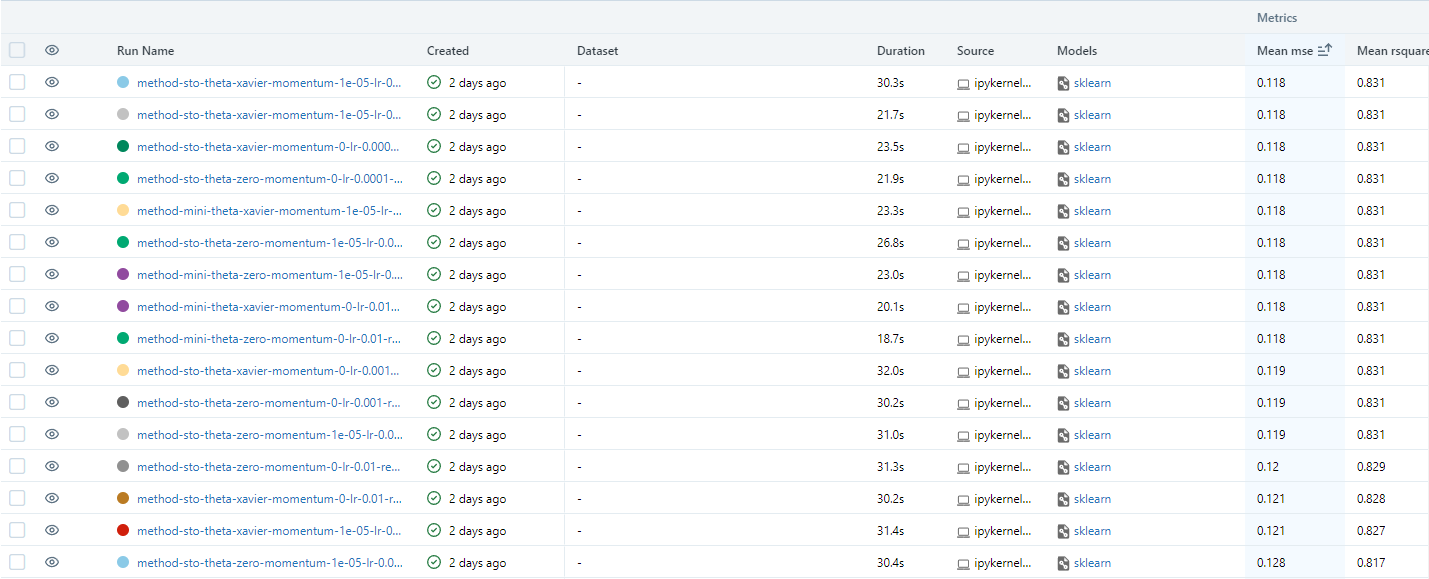

In [2]:
# Display the image
from IPython.display import Image
Image(filename='image1.png')


I selected the first model since it has least mean of mse.

## Testing



After I obtain the best model, I test performance of the model with test dataset.

In [48]:
model = mlflow.pyfunc.load_model('runs:/c9d107e58e6a4c13ba6749dcda021f02/model/')

yhat = model.predict(X_test)
mse  = ((yhat - y_test) ** 2).sum() / y_test.shape[0]
r2 = 1-(((yhat - y_test) ** 2).sum() / (((y_test.sum()/y_test.shape[0])- y_test) ** 2).sum())


print("Test MSE: ", mse)
print("Test R2: ", r2)

Test MSE:  0.11394976609125396
Test R2:  0.8380444886455385


## Analysis:  Feature Importance


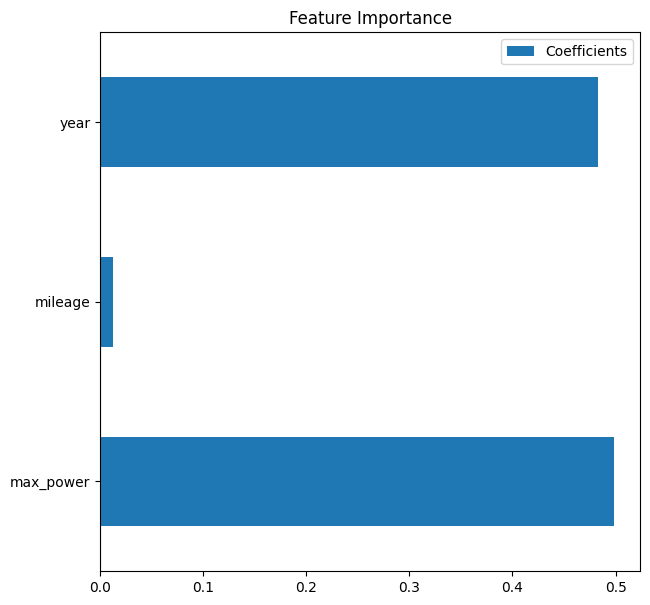

In [54]:
def feature_importance(theta):
        coefs = pd.DataFrame(
        theta, columns=["Coefficients"], index=['max_power', 'mileage',  'year']
        )

        coefs.plot(kind="barh", figsize=(9, 7))
        plt.title("Feature Importance")
        plt.axvline(x=0, color=".5")
        plt.subplots_adjust(left=0.3)

        
run = mlflow.get_run(run_id="c9d107e58e6a4c13ba6749dcda021f02")
thetas = list()

for i in range(X_train.shape[1]-1):
        thetas.append(run.data.metrics[f'weight-{i}'])
feature_importance(thetas)

According to graph, significant features are max power and year.

## Summary

In this project, I used ML flow to compare different of each model. The best peeformance model is Normal model with momentum, batch, xavier with learning rate =0.001.